# Датасет 
## Sberbank Russian Housing Market
https://www.kaggle.com/competitions/sberbank-russian-housing-market/overview

Расходы на жилье требуют значительных инвестиций как от потребителей, так и от застройщиков. И когда дело доходит до планирования бюджета — будь то личного или корпоративного — последнее, что кому-либо нужно, это неопределенность в отношении одного из самых крупных расходов. Сбербанк, старейший и крупнейший банк России, помогает своим клиентам прогнозировать цены на недвижимость, чтобы арендаторы, застройщики и кредиторы были более уверены при заключении договора аренды или покупке здания.

Target - Цена (целевой признак) — цена квартиры.

Разнообразные признаки — количество комнат, площадь, этаж, год постройки, расстояние до центра города и пр

## Сравнение с аналогами :

### Ames Housing Dataset

Набор данных о жилье в Эймсе, который описывает продажу индивидуальной жилой недвижимости в Эймсе, штат Айова, с 2006 по 2010 год, был составлен Дином Де Коком для использования в образовании в области науки о данных. Он был разработан на основе бостонского набора данных о жилищном строительстве и в настоящее время считается его более модернизированной и расширенной версией. Более подробная информация об этом наборе данных представлена в статье "Эймс, Айова: Альтернатива бостонским данным о жилищном строительстве" в качестве регрессионного проекта в конце семестра.

Цель - спрогнозировать окончательную цену продажи каждого дома на основе 79 других объясняющих переменных.

### California Housing Dataset

Эти данные содержат данные переписи населения Калифорнии 1990 года. Таким образом, хотя они, возможно, и не помогут вам прогнозировать текущие цены на жилье, как набор данных Zillow Zestimate, они предоставляют доступный вводный набор данных для обучения людей основам машинного обучения.

### Основным отличием датасета Sberbank Russian Housing Market от аналогов является то, что данные в нем содержат информацию об отечественых обьектах недвижимости, в то время как в других - об американских обьектах.

In [1]:
import pandas as pd
import os
import zipfile
from sklearn.model_selection import train_test_split
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

## Даталоадер

In [2]:
# Убедитесь, что путь к файлу kaggle.json указан верно
os.environ['KAGGLE_CONFIG_DIR'] = "/home/jupyter/datasphere/"

class HousingDataLoader:
    def __init__(self, filepath):
        self.filepath = filepath
        self.data = None

    def extract_zip_files(self, directory):
        # Перебор всех файлов в указанной директории
        for filename in os.listdir(directory):
            # Формирование полного пути к файлу
            file_path = os.path.join(directory, filename)

            # Проверка, является ли файл zip файлом
            if filename.endswith('.zip'):
                print(f'Находится zip файл: {filename}. Начинаем разархивирование...')
                
                # Разархивирование zip файла
                with zipfile.ZipFile(file_path, 'r') as zip_ref:
                    zip_ref.extractall(directory)

                print(f'Файл {filename} был успешно разархивирован.')
                try:
                    os.remove(f'{directory}/{filename}')
                    print(f'Файл {filename} был успешно удален.')
                except:
                    pass
            else:
                print(f'Найден файл -> {filename}')


    def load_data(self):
        """Загрузка данных из CSV файла"""
        if 'sberbank-russian-housing-market.zip' not in os.listdir():
            # Загрузка и распаковка данных
            !kaggle competitions download -c sberbank-russian-housing-market   
            # Распаковка
            with zipfile.ZipFile('sberbank-russian-housing-market.zip', 'r') as zip_ref:
                zip_ref.extractall('data')
        
        self.extract_zip_files('data')
        
        self.data = pd.read_csv(self.filepath)
        return self.data

    def get_features_labels(self):
        """Разделение данных на признаки и целевую переменную"""
        if self.data is None:
            raise ValueError("Data not loaded. Call load_data() first.")

        X = self.data.drop(columns=['price_doc'])
        y = self.data['price_doc']
        return X, y

    def train_test_split(self, test_size=0.2, random_state=None):
        """Разделение данных на обучающую и тестовую выборки"""
        X, y = self.get_features_labels()
        return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
# Пример использования DataLoader
housing_data_loader = HousingDataLoader('data/test.csv')
data = housing_data_loader.load_data()
print(data.head())

Найден файл -> data_dictionary.txt
Находится zip файл: macro.csv.zip. Начинаем разархивирование...
Файл macro.csv.zip был успешно разархивирован.
Находится zip файл: sample_submission.csv.zip. Начинаем разархивирование...
Файл sample_submission.csv.zip был успешно разархивирован.
Находится zip файл: test.csv.zip. Начинаем разархивирование...
Файл test.csv.zip был успешно разархивирован.
Находится zip файл: train.csv.zip. Начинаем разархивирование...
Файл train.csv.zip был успешно разархивирован.
      id   timestamp  ...  sport_count_5000  market_count_5000
0  30474  2015-07-01  ...                14                  1
1  30475  2015-07-01  ...                12                  1
2  30476  2015-07-01  ...                71                 11
3  30477  2015-07-01  ...                 2                  0
4  30478  2015-07-01  ...                11                  1

[5 rows x 291 columns]


In [15]:
housing_data_loader = HousingDataLoader('data/train.csv')
data = housing_data_loader.load_data()
X_train, X_test, y_train, y_test = housing_data_loader.train_test_split()
print(data.head()) 

print(X_train.head())

Найден файл -> data_dictionary.txt
Находится zip файл: macro.csv.zip. Начинаем разархивирование...
Файл macro.csv.zip был успешно разархивирован.
Файл macro.csv.zip был успешно удален.
Находится zip файл: sample_submission.csv.zip. Начинаем разархивирование...
Файл sample_submission.csv.zip был успешно разархивирован.
Файл sample_submission.csv.zip был успешно удален.
Находится zip файл: test.csv.zip. Начинаем разархивирование...
Файл test.csv.zip был успешно разархивирован.
Файл test.csv.zip был успешно удален.
Находится zip файл: train.csv.zip. Начинаем разархивирование...
Файл train.csv.zip был успешно разархивирован.
Файл train.csv.zip был успешно удален.
Найден файл -> macro.csv
Найден файл -> sample_submission.csv
Найден файл -> test.csv
Найден файл -> __MACOSX
Найден файл -> train.csv
Найден файл -> .ipynb_checkpoints
   id   timestamp  full_sq  ...  sport_count_5000  market_count_5000  price_doc
0   1  2011-08-20       43  ...                52                  4    5850000
1  

# Статистика

In [6]:
df = pd.read_csv("data/train.csv")

### Количество записей

In [6]:
df.shape[0]

30471

### Количество полей

In [7]:
df.shape[1]

292

### Объём одной записи в битах

In [13]:
(df.memory_usage(deep=True).sum() / df.shape[0]) * 8

25488.29326244626

### Кол-во фичей

In [14]:
df.shape[1] - 1

291

### Процент разбиения на классы

Так как рассматривается задача регрессии -> нельзя посчитать эту велечину.
Поэтому построим гистограмму

<Axes: xlabel='price_doc', ylabel='Count'>

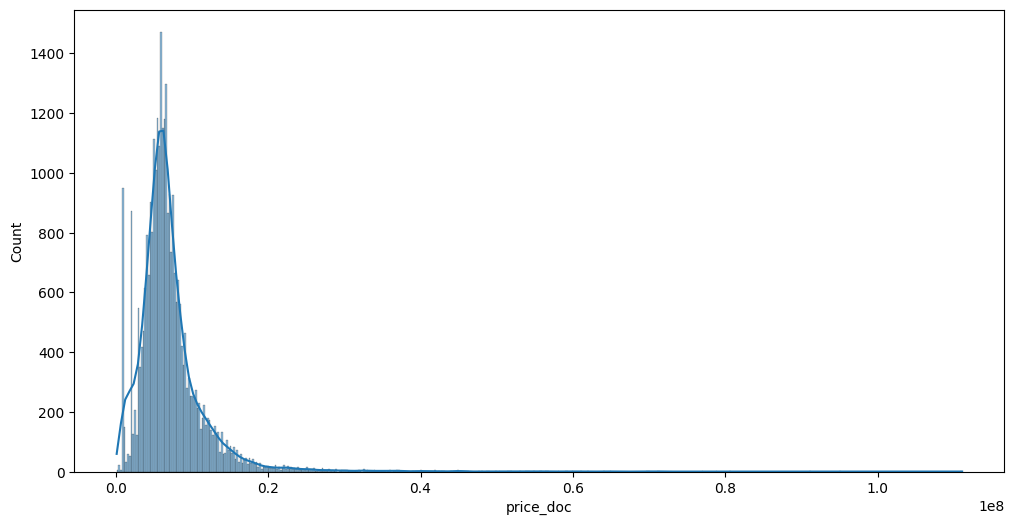

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="price_doc", kde=True)

### Количество пропусков

In [32]:
df.isnull().sum().sum()

261001

### Типы данных


In [33]:
df.dtypes

timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
max_floor             float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 284, dtype: object

### Приведем общую статистику

In [47]:
df.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,23783.000000,30471.000000,30471.000000,23786.000000,30471.000000,30471.000000,16030.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,...,29480.000000,29480.000000,29480.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30293.000000,30471.000000,3.047100e+04,30471.000000,3.047100e+04,30471.000000,30174.000000,30174.000000,30174.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,84056.425552,0.218922,0.118871,5140.026156,3271.272464,4.065111,5354.269699,8324.970739,4.705031,0.109678,1190.738677,1.320895,0.138295,6.635030,2.896393,0.286732,4.200978,8.253454,1.463062e+05,67207.789603,79098.662105,11178.809491,5723.853106,5455.013948,53667.908897,27253.585803,26414.414821,19209.707164,5811.618162,13398.167438,...,765.900619,1283.334756,1024.617808,7.274622,27.782055,30.450297,26.685078,13.320108,4.646516,0.707131,6.122674,12.287979,0.199075,3.876440,20.239310,2.319944,22.769557,10.348669,71.356240,1.401057e+06,30.131863,1.173871e+06,265.528470,765.098467,1278.280635,1021.689513,17.806898,66.195530,73.442421,63.469660,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,57871.285899,0.175090,0.118688,3816.625140,2169.759592,2.993795,3989.640917,4289.734174,3.445105,0.333328,1057.015001,1.492903,0.443796,6.571982,3.290058,1.510491,4.741812,23.536953,2.830251e+05,129444.557322,153630.894568,8287.957623,4275.438364,4020.546283,37483.559701,18939.154637,18643.132758,13174.721197,4073.828409,9144.326481,...,224.006719,353.299663,288.163451,18.242400,71.826492,69.528682,70.855732,41.282000,16.884524,2.775499,15.413697,25.785241,0.447815,13.188748,18.843867,2.271539,11.208471,5.668748,155.341

# Алгоритм

Приведу ссылку на решение одной из команд, получившей бронзу на kaggle-соревновании.

https://www.kaggle.com/code/anastasiakorotkova/sber-eda/notebook

Воспользуюсь их кодом для работы с датасетом, EDA, моделями. 

### Кроме того попытаюсь сам обучить другие модели

In [7]:
df = df.drop('id', axis=1)

df = df.drop(['ID_metro',
 'ID_railroad_station_walk',
 'ID_railroad_station_avto',
 'ID_big_road1',
 'ID_big_road2',
 'ID_railroad_terminal',
 'ID_bus_terminal'], axis=1)

In [8]:
df = df.assign(log_price_doc=np.log1p(df['price_doc']))
df = df.drop('price_doc', axis=1)

### Работа с пропусками и элементы EDA

In [9]:
### Посмотрим на некатегориальные колонки

numeric_columns = df.select_dtypes(exclude='object').columns

df.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,log_price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,23783.000000,30471.000000,30471.000000,23786.000000,30471.000000,30471.000000,16030.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,...,29480.000000,29480.000000,29480.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30293.000000,30471.000000,3.047100e+04,30471.000000,3.047100e+04,30471.000000,30174.000000,30174.000000,30174.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,84056.425552,0.218922,0.118871,5140.026156,3271.272464,4.065111,5354.269699,8324.970739,4.705031,0.109678,1190.738677,1.320895,0.138295,6.635030,2.896393,0.286732,4.200978,8.253454,1.463062e+05,67207.789603,79098.662105,11178.809491,5723.853106,5455.013948,53667.908897,27253.585803,26414.414821,19209.707164,5811.618162,13398.167438,...,765.900619,1283.334756,1024.617808,7.274622,27.782055,30.450297,26.685078,13.320108,4.646516,0.707131,6.122674,12.287979,0.199075,3.876440,20.239310,2.319944,22.769557,10.348669,71.356240,1.401057e+06,30.131863,1.173871e+06,265.528470,765.098467,1278.280635,1021.689513,17.806898,66.195530,73.442421,63.469660,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,15.609483
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,57871.285899,0.175090,0.118688,3816.625140,2169.759592,2.993795,3989.640917,4289.734174,3.445105,0.333328,1057.015001,1.492903,0.443796,6.571982,3.290058,1.510491,4.741812,23.536953,2.830251e+05,129444.557322,153630.894568,8287.957623,4275.438364,4020.546283,37483.559701,18939.154637,18643.132758,13174.721197,4073.828409,9144.326481,...,224.006719,353.299663,288.163451,18.242400,71.826492,69.528682,70.855732,41.282000,16.884524,2.775499,15.413697,25.785241,0.447815,13.188748,18.843867,2.271539,11.208471,5.668748,155.34

In [10]:
### Заполним средним

for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

In [11]:
### Изучим корелляции вещественных признаков

df[numeric_columns].corr()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,log_price_doc
full_sq,1.000000,0.153837,0.089450,0.057390,0.015820,-0.002532,0.334760,0.009640,-0.038544,0.056303,-0.038929,0.030836,-0.053589,-0.025619,-0.003449,-0.010669,-0.024265,0.015712,-0.012084,0.020713,-0.001476,-0.007840,0.045654,0.028109,0.007401,0.026174,0.010188,0.033494,0.012936,0.012862,0.012995,-0.025232,-0.024877,-0.025560,-0.038306,-0.037868,-0.038548,-0.046142,-0.042117,-0.047715,...,0.037806,0.037002,0.037378,0.033606,0.033487,0.035137,0.037810,0.039972,0.037744,0.043428,0.028913,0.030714,0.023576,0.032429,0.010604,-0.035264,0.002460,-0.058198,0.031512,0.026127,0.000679,-0.006647,0.034547,0.048752,0.048101,0.048404,0.033090,0.030584,0.031762,0.036845,0.039083,0.040059,0.043560,0.026895,0.028579,0.021568,0.030218,0.001580,-0.041254,0.271408
life_sq,0.153837,1.000000,0.038603,0.034483,0.010200,-0.002324,0.169211,0.000651,-0.058546,0.043262,-0.053619,0.031481,-0.035166,-0.045766,-0.013633,-0.042756,-0.044351,0.000149,-0.042534,0.004781,-0.000333,-0.025517,0.021772,-0.001491,-0.002894,0.024389,-0.003405,0.025101,-0.022219,-0.022140,-0.022278,-0.045252,-0.045162,-0.045256,-0.053648,-0.053576,-0.053435,-0.054426,-0.051023,-0.055682,...,0.036136,0.035206,0.035628,0.023172,0.023008,0.022824,0.025733,0.028481,0.029572,0.032019,0.019789,0.020399,0.019616,0.024559,-0.007450,-0.035429,0.018421,-0.051229,0.019063,0.013839,-0.018751,-0.021379,0.019710,0.045546,0.044705,0.045079,0.019100,0.017037,0.016387,0.020871,0.024240,0.026800,0.029921,0.014980,0.015187,0.008870,0.019099,-0.012124,-0.043462,0.119971
floor,0.089450,0.038603,1.000000,0.373873,-0.007439,0.000855,-0.004654,-0.006957,-0.083337,-0.019321,-0.046807,0.001060,-0.017819,-0.011971,0.048675,0.013170,-0.016425,0.070476,-0.006761,-0.009875,-0.072410,-0.076519,0.001375,-0.035743,0.044369,0.014774,0.015998,-0.019530,-0.027989,-0.028414,-0.027620,-0.014796,-0.014359,-0.015234,-0.039799,-0.039736,-0.039652,-0.083064,-0.080570,-0.083781,...,0.036358,0.043757,0.040956,-0.020009,-0.016992,-0.017190,-0.010060,-0.008732,-0.006392,-0.012095,-0.016478,-0.011373,0.005983,-0.008401,-0.086495,-0.081332,-0.033222,-0.101985,-0.050478,-0.064104,-0.077792,-0.082449,-0.043348,0.028477,0.035675,0.032885,-0.046052,-0.050948,-0.047559,-0.039079,-0.034680,-0.029541,-0.022228,-0.044265,-0.045475,-0.012222,-0.044093,-0.101769,-0.123534,0.117870
max_floor,0.057390,0.034483,0.373873,1.000000,0.045915,-0.000215,-0.014220,0.020345,-0.061203,-0.079591,-0.013341,0.012058,-0.012906,0.017769,0.059685,0.034885,0.011851,0.068342,0.009953,-0.012016,-0.090488,-0.058645,0.

### Смысла строить heatmap особо нет (фичей очень много)

In [12]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 50))

Top Absolute Correlations
railroad_station_walk_km              railroad_station_walk_min                1.000000
public_transport_station_km           public_transport_station_min_walk        1.000000
children_school                       7_14_all                                 1.000000
children_preschool                    0_6_all                                  1.000000
metro_min_walk                        metro_km_walk                            1.000000
raion_build_count_with_material_info  raion_build_count_with_builddate_info    0.999990
young_all                             0_13_all                                 0.999885
young_female                          0_13_female                              0.999871
young_male                            0_13_male                                0.999861
full_all                              female_f                                 0.999850
                                      male_f                                   0.999788
young_

In [13]:
### Удалим колонки, где корреляция оказывается > 0.9

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    
correlation(df, 0.9)

/tmp/ipykernel_2382/3877138223.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


In [63]:
### Около 100 колонок ушли

df.shape

(30471, 150)

In [65]:
### Посмотрим на квазиконстантые признаки

from sklearn.feature_selection import VarianceThreshold

numeric_columns = df.select_dtypes(exclude='object').columns
cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])
constant_cols = [x for x in numeric_columns if x not in cutter.get_feature_names_out()]


df[constant_cols]

,green_zone_part,indust_part,green_zone_km,cafe_count_500_price_high,mosque_count_500,mosque_count_1000,mosque_count_1500,mosque_count_2000
0,0.189727,0.000070,0.600973,0,0,0,0,0
1,0.372602,0.049637,0.065321,0,0,0,0,0
2,0.112560,0.118537,0.453172,0,0,0,0,0
3,0.194703,0.069753,0.106125,0,0,0,0,0
4,0.015234,0.037316,0.236214,0,0,0,0,0
...,...,...,...,...,...,...,...,...
30466,0.096270,0.300323,0.139814,0,0,0,0,1
30467,0.065444,0.000078,0.271861,0,0,0,0,0
30468,0.496315,0.007122,0.427248,0,0,0,0,0
30469,0.167526,0.093443,0.227547,0,0,0,0,0


In [14]:
### Посмотрим на категориальные колонки

categorical_columns = df.select_dtypes(include='object').columns

### Изучим их

df.describe(include='object')

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,1161,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,2014-12-16,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,160,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


In [15]:
### Преобразуем категориальные колонки

for col in categorical_columns:
    if col != 'timestamp': 
        if df[col].nunique() < 5:
            one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

        else:
            mean_target = df.groupby(col)['log_price_doc'].mean()
            df[col] = df[col].map(mean_target)

In [69]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,...,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,...,566.67,0,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,...,694.12,0,0,9,0,19.25,165510,179065,695.24,0,0,18.07,27.32,14,491565,631.03,0,19,1,10.26,27.47,66,2034942,673.81,1,14,15.607270,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.613141,4.808270e+06,101708,0.112560,0.118537,1463.0,4,0,1183.000000,1,0,5,1,0,0,1,101982,330.0,59.0,0.0,0.0,206.0,4.0,60.0,0.0,0.0,1.0,246.0,63.0,20.0,...,516.67,0,0,6,5,12.75,100200,52550,563.64,0,5,12.14,26.46,7,52550,697.44,0,20,6,13.69,21.58,43,1572990,702.68,0,10,15.555977,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.914449,1.258354e+07,178473,0.194703,0.069753,6839.0,9,0,1190.738677,1,0,17,6,0,11,4,21155,458.0,9.0,51.0,12.0,124.0,50.0,201.0,0.0,2.0,13.0,40.0,130.0,252.0,...,673.91,0,0,9,2,5.73,11000,89492,660.00,0,2,20.79,3.57,12,205756,718.75,0,18,3,14.18,3.89,8,942180,931.58,0,3,16.388123,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,16.091227,8.398461e+06,108171,0.015234,0.037316,3240.0,7,0,562.000000,4,2,25,2,0,10,93,28179,746.0,48.0,0.0,0.0,643.0,16.0,35.0,0.0,1.0,371.0,146.0,62.0,53.0,...,766.80,1,0,14,2,5.02,1625130,564843,765.93,0,3,5.06,8.62,60,2296870,853.03,1,77,5,8.38,10.92,689,3503058,853.88,2,14,16.608603,0,0,0,0,0,1,1,0,0,0,0,0,1


In [20]:
### Поработаем с датой

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['month'] = df.timestamp.dt.month
df['year'] = df.timestamp.dt.year

/tmp/ipykernel_2382/837974367.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['year'] = df.timestamp.dt.year


In [71]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,...,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,...,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2011
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,...,0,9,0,19.25,165510,179065,695.24,0,0,18.07,27.32,14,491565,631.03,0,19,1,10.26,27.47,66,2034942,673.81,1,14,15.607270,0,1,0,0,0,0,0,0,0,0,0,0,0,8,2011
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.613141,4.808270e+06,101708,0.112560,0.118537,1463.0,4,0,1183.000000,1,0,5,1,0,0,1,101982,330.0,59.0,0.0,0.0,206.0,4.0,60.0,0.0,0.0,1.0,246.0,63.0,20.0,...,0,6,5,12.75,100200,52550,563.64,0,5,12.14,26.46,7,52550,697.44,0,20,6,13.69,21.58,43,1572990,702.68,0,10,15.555977,0,0,0,0,0,1,0,0,0,0,0,0,0,8,2011
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.914449,1.258354e+07,178473,0.194703,0.069753,6839.0,9,0,1190.738677,1,0,17,6,0,11,4,21155,458.0,9.0,51.0,12.0,124.0,50.0,201.0,0.0,2.0,13.0,40.0,130.0,252.0,...,0,9,2,5.73,11000,89492,660.00,0,2,20.79,3.57,12,205756,718.75,0,18,3,14.18,3.89,8,942180,931.58,0,3,16.388123,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2011
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,16.091227,8.398461e+06,108171,0.015234,0.037316,3240.0,7,0,562.000000,4,2,25,2,0,10,93,28179,746.0,48.0,0.0,0.0,643.0,16.0,35.0,0.0,1.0,371.0,146.0,62.0,53.0,...,0,14,2,5.02,1625130,564843,765.93,0,3,5.06,8.62,60,2296870,853.03,1,77,5,8.38,10.92,689,3503058,853.88,2,14,16.608603,0,0,0,0,0,1,1,0,0,0,0,0,1,9,2011


In [17]:
### Отсортируем по timestamp

df = df.sort_values('timestamp')

df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,...,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,...,0,7,1,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2011
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,...,0,9,0,19.25,165510,179065,695.24,0,0,18.07,27.32,14,491565,631.03,0,19,1,10.26,27.47,66,2034942,673.81,1,14,15.607270,0,1,0,0,0,0,0,0,0,0,0,0,0,8,2011
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.613141,4.808270e+06,101708,0.112560,0.118537,1463.0,4,0,1183.000000,1,0,5,1,0,0,1,101982,330.0,59.0,0.0,0.0,206.0,4.0,60.0,0.0,0.0,1.0,246.0,63.0,20.0,...,0,6,5,12.75,100200,52550,563.64,0,5,12.14,26.46,7,52550,697.44,0,20,6,13.69,21.58,43,1572990,702.68,0,10,15.555977,0,0,0,0,0,1,0,0,0,0,0,0,0,8,2011
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.914449,1.258354e+07,178473,0.194703,0.069753,6839.0,9,0,1190.738677,1,0,17,6,0,11,4,21155,458.0,9.0,51.0,12.0,124.0,50.0,201.0,0.0,2.0,13.0,40.0,130.0,252.0,...,0,9,2,5.73,11000,89492,660.00,0,2,20.79,3.57,12,205756,718.75,0,18,3,14.18,3.89,8,942180,931.58,0,3,16.388123,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2011
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,16.091227,8.398461e+06,108171,0.015234,0.037316,3240.0,7,0,562.000000,4,2,25,2,0,10,93,28179,746.0,48.0,0.0,0.0,643.0,16.0,35.0,0.0,1.0,371.0,146.0,62.0,53.0,...,0,14,2,5.02,1625130,564843,765.93,0,3,5.06,8.62,60,2296870,853.03,1,77,5,8.38,10.92,689,3503058,853.88,2,14,16.608603,0,0,0,0,0,1,1,0,0,0,0,0,1,9,2011


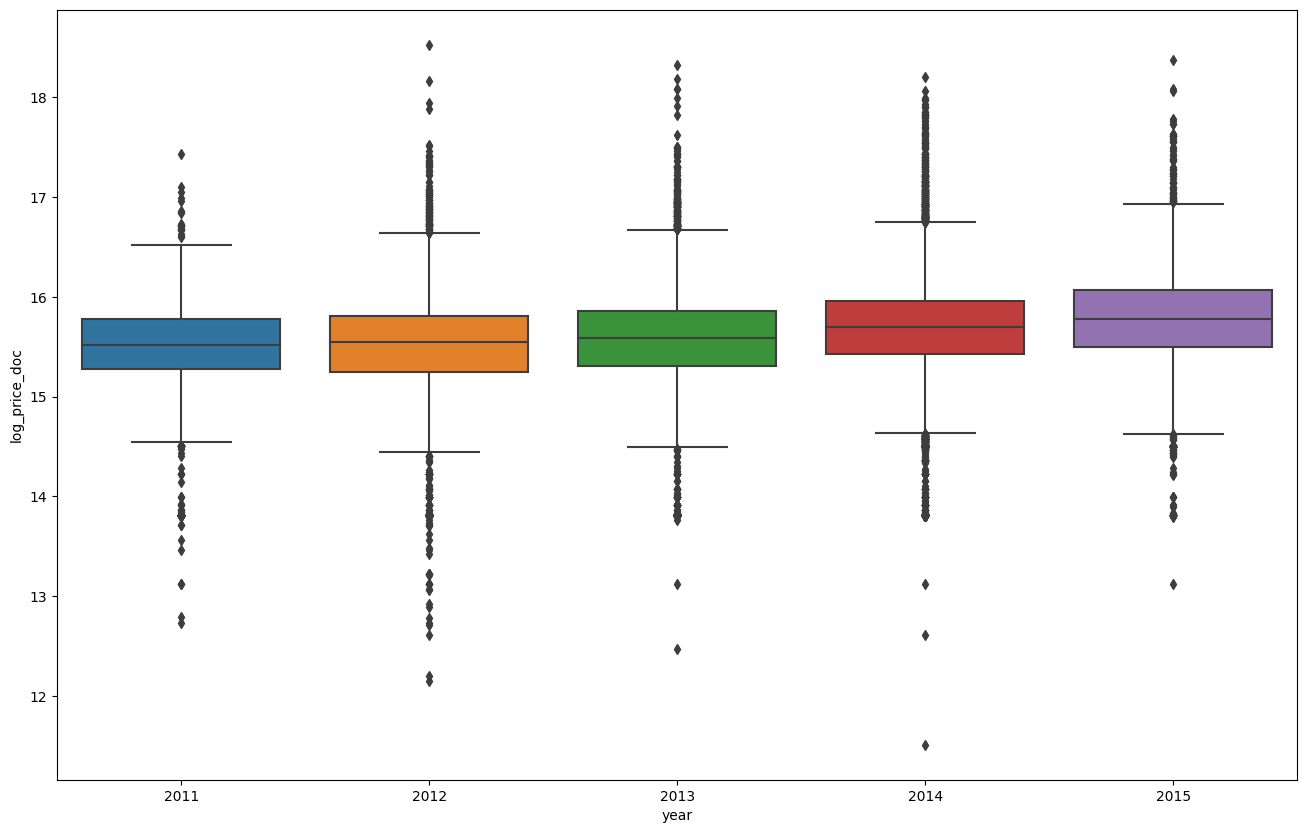

In [73]:
### распределения таргета по годам

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=df['year'].astype('category'), data=df)
plt.show()

In [18]:
### Закодируем колонку с годом через One-Hot

one_hot = pd.get_dummies(df['year'], prefix='year', drop_first=True)
df = pd.concat((df.drop('year', axis=1), one_hot), axis=1)

In [19]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,...,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year_2012,year_2013,year_2014,year_2015
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,...,15.97,188854,1244891,614.29,0,1,11.98,13.55,23,1419204,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,...,19.25,165510,179065,695.24,0,0,18.07,27.32,14,491565,631.03,0,19,1,10.26,27.47,66,2034942,673.81,1,14,15.607270,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.613141,4.808270e+06,101708,0.112560,0.118537,1463.0,4,0,1183.000000,1,0,5,1,0,0,1,101982,330.0,59.0,0.0,0.0,206.0,4.0,60.0,0.0,0.0,1.0,246.0,63.0,20.0,...,12.75,100200,52550,563.64,0,5,12.14,26.46,7,52550,697.44,0,20,6,13.69,21.58,43,1572990,702.68,0,10,15.555977,0,0,0,0,0,1,0,0,0,0,0,0,0,8,0,0,0,0
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.914449,1.258354e+07,178473,0.194703,0.069753,6839.0,9,0,1190.738677,1,0,17,6,0,11,4,21155,458.0,9.0,51.0,12.0,124.0,50.0,201.0,0.0,2.0,13.0,40.0,130.0,252.0,...,5.73,11000,89492,660.00,0,2,20.79,3.57,12,205756,718.75,0,18,3,14.18,3.89,8,942180,931.58,0,3,16.388123,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,16.091227,8.398461e+06,108171,0.015234,0.037316,3240.0,7,0,562.000000,4,2,25,2,0,10,93,28179,746.0,48.0,0.0,0.0,643.0,16.0,35.0,0.0,1.0,371.0,146.0,62.0,53.0,...,5.02,1625130,564843,765.93,0,3,5.06,8.62,60,2296870,853.03,1,77,5,8.38,10.92,689,3503058,853.88,2,14,16.608603,0,0,0,0,0,1,1,0,0,0,0,0,1,9,0,0,0,0


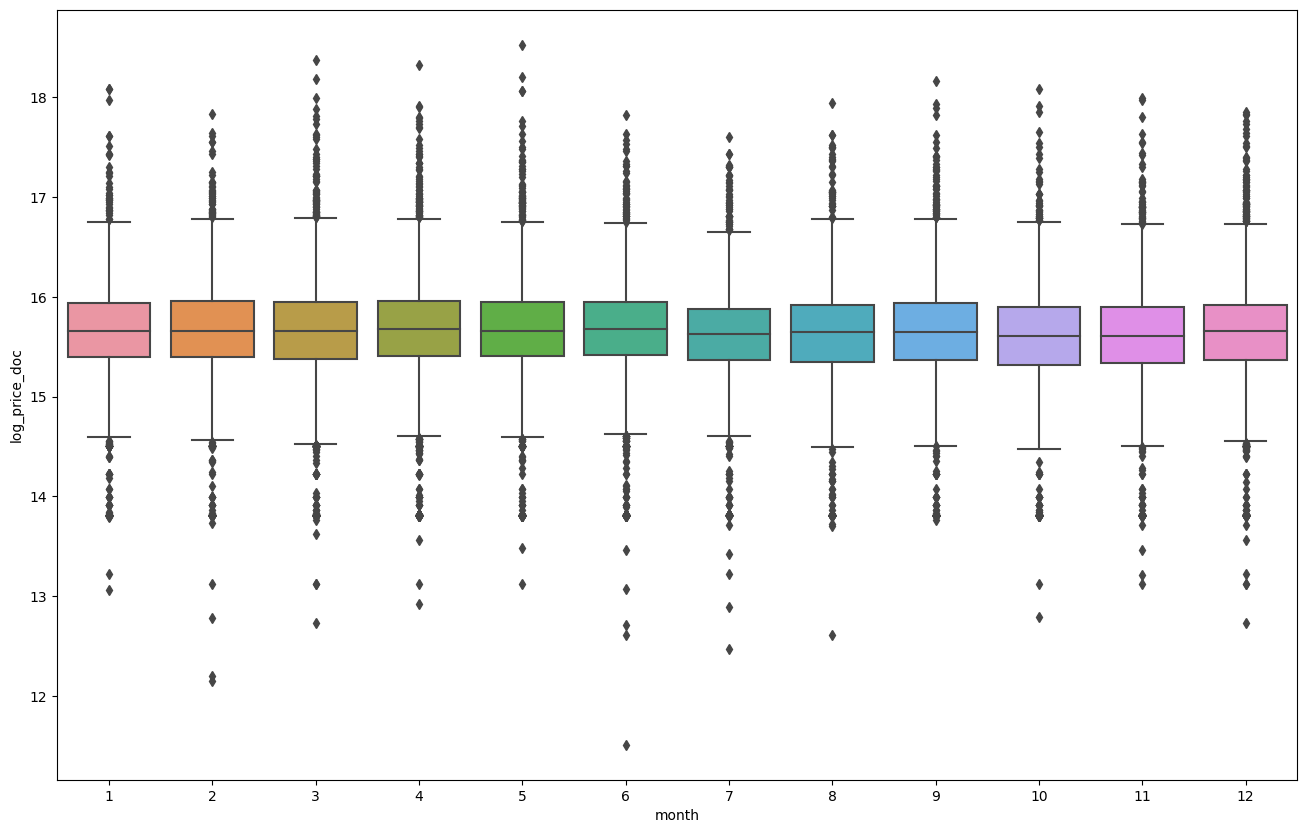

In [76]:
### Распределения таргета по месяцам

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=df['month'].astype('category'), data=df)
plt.show()

In [77]:
### Закодируем колонку с месяцем через One-Hot

one_hot = pd.get_dummies(df['month'], prefix='month', drop_first=True)
df = pd.concat((df.drop('month', axis=1), one_hot), axis=1)

In [78]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,sub_area,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,...,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,log_price_doc,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,year_2012,year_2013,year_2014,year_2015,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.594247,6.407578e+06,155572,0.189727,0.000070,5001.0,5,0,240.000000,1,0,7,3,0,16,1,86206,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,0.0,206.0,5.0,...,639.68,0,21,1,13.09,13.31,29,4036616,708.57,1,4,15.581952,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.864842,9.589337e+06,115352,0.372602,0.049637,3119.0,5,0,229.000000,1,0,6,1,1,3,0,76284,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,1.0,143.0,84.0,15.0,...,631.03,0,19,1,10.26,27.47,66,2034942,673.81,1,14,15.607270,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.613141,4.808270e+06,101708,0.112560,0.118537,1463.0,4,0,1183.000000,1,0,5,1,0,0,1,101982,330.0,59.0,0.0,0.0,206.0,4.0,60.0,0.0,0.0,1.0,246.0,63.0,20.0,...,697.44,0,20,6,13.69,21.58,43,1572990,702.68,0,10,15.555977,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,15.914449,1.258354e+07,178473,0.194703,0.069753,6839.0,9,0,1190.738677,1,0,17,6,0,11,4,21155,458.0,9.0,51.0,12.0,124.0,50.0,201.0,0.0,2.0,13.0,40.0,130.0,252.0,...,718.75,0,18,3,14.18,3.89,8,942180,931.58,0,3,16.388123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,16.091227,8.398461e+06,108171,0.015234,0.037316,3240.0,7,0,562.000000,4,2,25,2,0,10,93,28179,746.0,48.0,0.0,0.0,643.0,16.0,35.0,0.0,1.0,371.0,146.0,62.0,53.0,...,853.03,1,77,5,8.38,10.92,689,3503058,853.88,2,14,16.608603,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


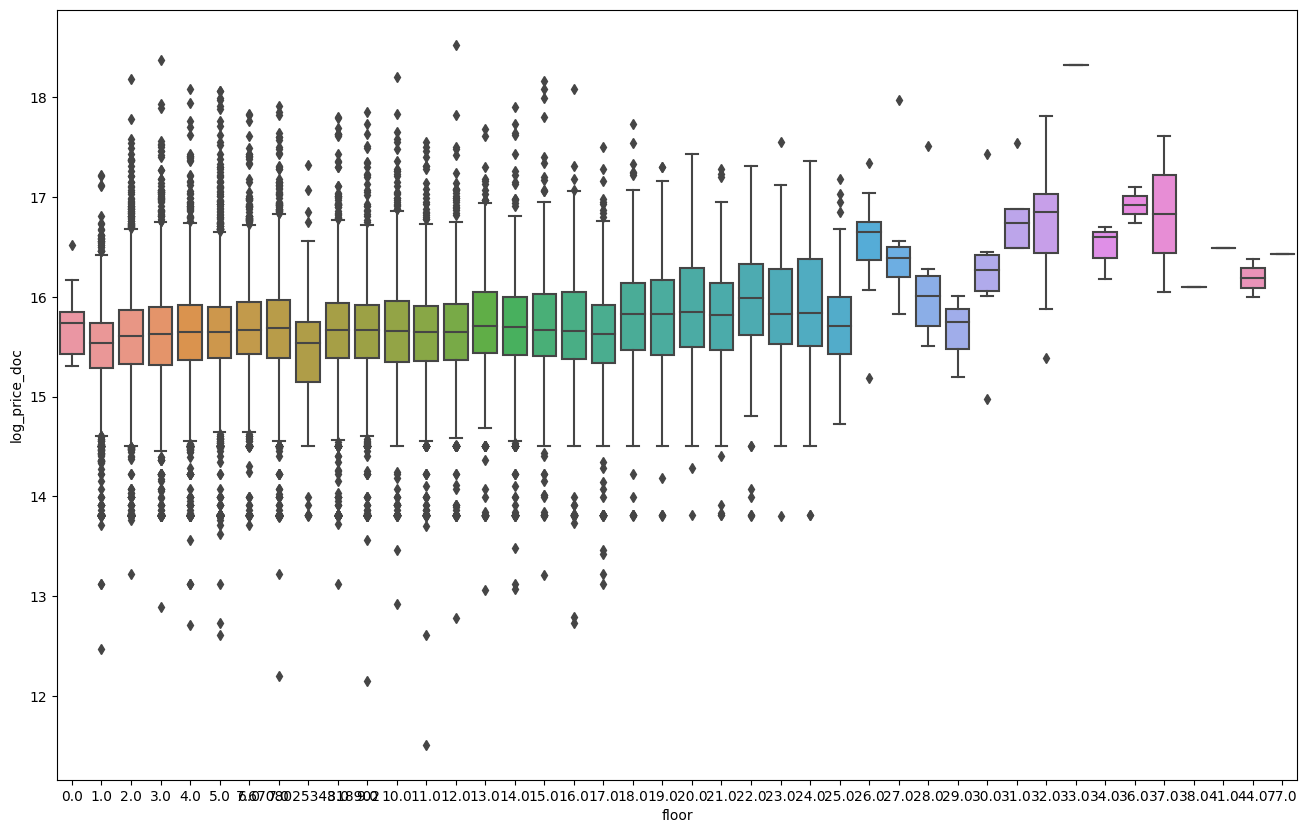

In [79]:
### Распределения таргета по этажу

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=df['floor'].astype('category'), data=df)
plt.show()

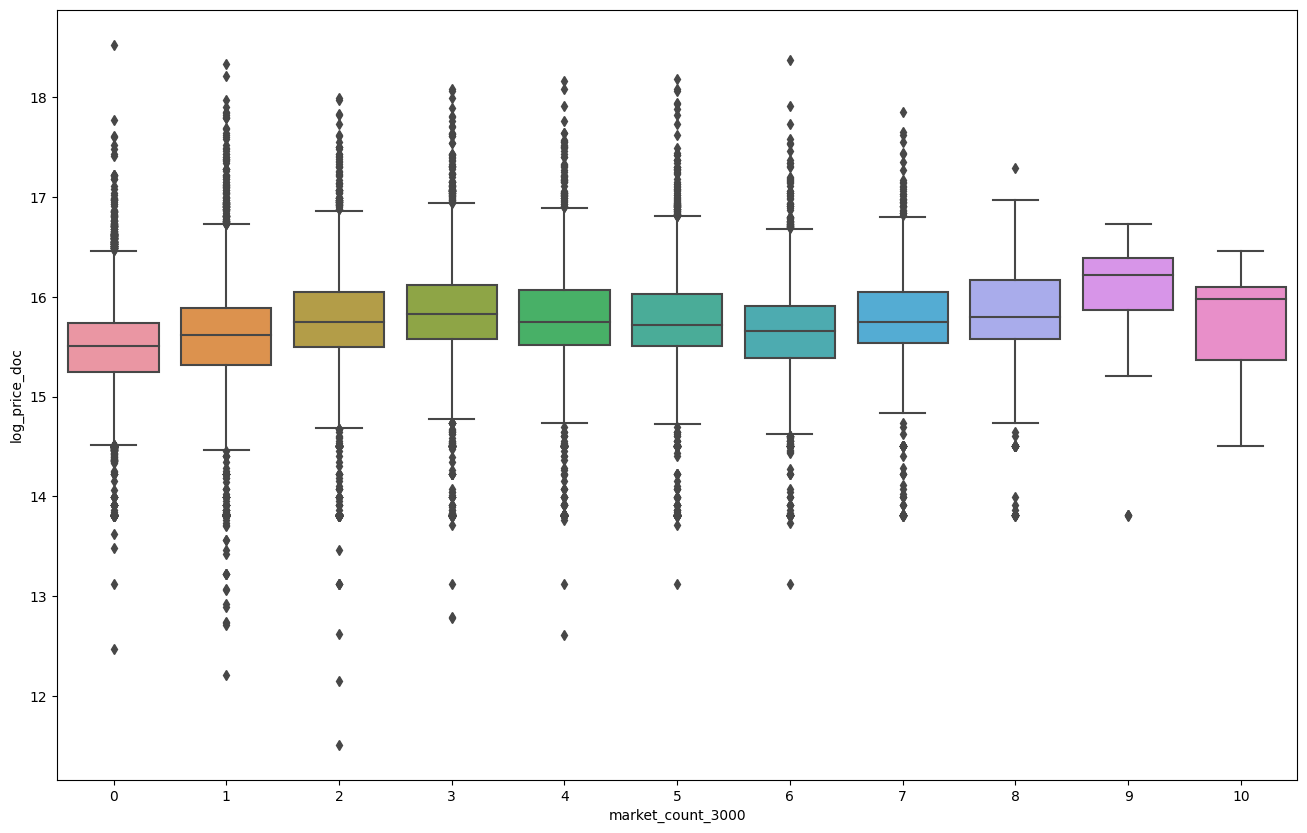

In [80]:
### Распределения таргета по количеству магазинов в радиусе 3км

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.boxplot(y='log_price_doc', x=df['market_count_3000'].astype('category'), data=df)
plt.show()

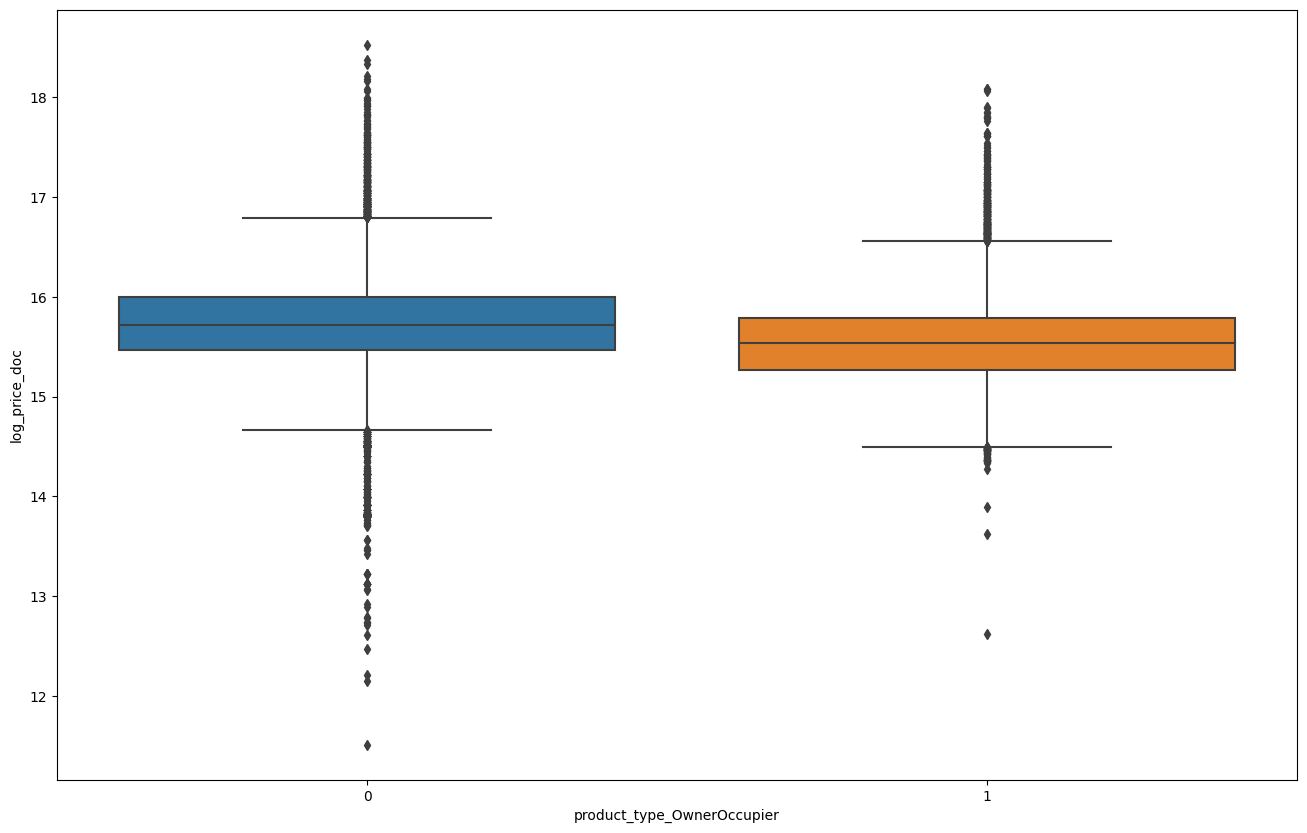

In [81]:
### Распределения таргета по типу недвижимости

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.boxplot(y='log_price_doc', x=df['product_type_OwnerOccupier'].astype('category'), data=df)
plt.show()

In [82]:
### Уберем timestamp

df = df.drop('timestamp', axis=1)

In [83]:
### Отделим таргеты от объектов

X = df.drop('log_price_doc', axis=1)
Y = df['log_price_doc']

## Построим пару базовых моделей в качестве бэйзлайна

## 


Теперь наши данные обладают временной структурой. Поэтому, чтобы получить хорошую обобщающую способность, мы хотим построить не просто модель, хорошо работающую на новых данных, а модель, которая угадывает распределение данных в будущем хотя бы на коротком горизонте. Поэтому, когда мы валидируем дизайн модели, нам важно делить на каждом шаге трейн и тест таким образом, чтобы по временной шкале они не пересекались, и точки из второго множества появлялись позже точек из первого.



Установим "Тренировочную базу" - некоторое множество $\{x_t: x_t\in X, t <= T_0 \}$. Далее на каждом шаге будем отсутпать от него на некоторый фиксированный (для простоты) интервал $T_1$, называя все объекты, которые в него попали, валидацией на текущем шаге. После обучения модели и замера качества, будем добавлять $T_1$ к тренировочной базе. Новую модель будем обучать на более широком трейне, а тест - на более далеких во времени данных.

In [21]:
### Разделим выборку на валидацию и тест

from sklearn.model_selection import TimeSeriesSplit

splitter = TimeSeriesSplit(n_splits=4)

In [85]:
### Конструкция для замера качества на Кросс-Валидации

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

splitter = KFold(n_splits=4, shuffle=True, random_state=33)

test_losses = []
train_losses = []

for train_index, test_index in splitter.split(X):
        
    x_train, x_test = X.values[train_index], X.values[test_index]
    y_train, y_test = Y.values[train_index], Y.values[test_index]
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    preds_test = model.predict(x_test)
    preds_train = model.predict(x_train)
    
    error_test = np.mean((preds_test - y_test)**2)
    error_train = np.mean((preds_train - y_train)**2)
    
    test_losses.append(error_test)
    train_losses.append(error_train)

print(f"Среднее MSLE на тренировочных фолдах: {np.mean(train_losses).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {np.mean(test_losses).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.24
Среднее MSLE на тестовых фолдах: 1.455


In [89]:
### модель регуляризации
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(max_iter=100000)

cv_result_lasso = cross_validate(model_lasso, X, Y, 
                                 scoring='neg_mean_squared_error',
                                 cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_lasso['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_lasso['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.296
Среднее MSLE на тестовых фолдах: 66.603


In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('Lasso', Lasso(max_iter=100000))])
pipe.fit(X, Y)


cv_result_pipe = cross_validate(pipe, X, Y, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

In [92]:
print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.365
Среднее MSLE на тестовых фолдах: 0.366


In [94]:
alphas = np.linspace(start=0.01, stop=1, num=30)
alphas

array([0.01      , 0.04413793, 0.07827586, 0.11241379, 0.14655172,
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ])

In [95]:
### коэффициент регуляризации

from sklearn.model_selection import GridSearchCV

param_grid = {
    "Lasso__alpha": alphas
}

### Передадим в GridSearchCV

search = GridSearchCV(pipe, param_grid, 
                      cv=splitter, scoring='neg_mean_squared_error')

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=-0.32776):
{'Lasso__alpha': 0.11241379310344828}


In [96]:
pipe.set_params(Lasso__alpha=search.best_params_['Lasso__alpha'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('Lasso', Lasso(alpha=0.11241379310344828, max_iter=100000))])

In [97]:
cv_result_pipe = cross_validate(pipe, X, Y, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.29
Среднее MSLE на тестовых фолдах: 0.328


### Анализ выбросов

In [98]:
data = pd.concat((X, Y), axis=1)

In [99]:
top_quantile = data['log_price_doc'].quantile(0.975)
low_quantile = data['log_price_doc'].quantile(0.025)

print(f"Топ 2,5% значение таргета: {top_quantile.round(2)}")
print(f"Топ 97,5% значение таргета: {low_quantile.round(2)}")

Топ 2,5% значение таргета: 16.7
Топ 97,5% значение таргета: 13.82


In [100]:
### Выбросим объекты со значениями вне отрезка [top 2,5%; top97,5%]

data = data[(data['log_price_doc']>low_quantile)&(data['log_price_doc']<top_quantile)]

X_new, Y_new = data.drop('log_price_doc', axis=1), data['log_price_doc']

In [101]:
new_splitter = TimeSeriesSplit(n_splits=4)

param_grid = {
    "Lasso__alpha": alphas
}

### Передадим в GridSearchCV

search = GridSearchCV(pipe, param_grid, 
                      cv=new_splitter, scoring='neg_mean_squared_error')

search.fit(X_new, Y_new)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=-0.16878):
{'Lasso__alpha': 0.07827586206896552}


In [102]:
pipe.set_params(Lasso__alpha=search.best_params_['Lasso__alpha'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('Lasso', Lasso(alpha=0.07827586206896552, max_iter=100000))])

In [103]:
cv_result_pipe = cross_validate(pipe, X_new, Y_new, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.157
Среднее MSLE на тестовых фолдах: 0.173


In [104]:
df.to_csv('data_after_eda.csv')

# Своя модель

In [3]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [88]:
col_to_del = {'cafe_count_1500_price_1000', 'office_count_1500', 'cafe_avg_price_3000', 'cafe_avg_price_1500', 'cafe_count_500_na_price', 'railroad_station_walk_min', 'cafe_count_1000_price_4000', 'big_church_count_1500', 'ekder_female', 'build_count_slag', 'cafe_count_1000_price_2500', 'prom_part_1500', 'children_school', 'cafe_avg_price_2000', 'cafe_count_5000_price_4000', 'basketball_km', 'cafe_count_500_price_1000', '7_14_female', '0_17_female', 'leisure_count_1500', 'shopping_centers_km', 'big_church_count_1000', 'cafe_count_1000_price_1000', 'cafe_sum_500_max_price_avg', 'trc_count_5000', 'cafe_count_5000_price_high', 'cafe_count_2000_price_500', 'cafe_count_1500', 'big_church_count_2000', 'cafe_count_1000_price_1500', 'big_church_km', 'church_count_1500', 'cafe_count_1500_price_500', 'cafe_count_3000_price_4000', 'cafe_count_2000_price_4000', '16_29_male', 'ekder_male', 'male_f', 'cafe_count_1000', 'cafe_avg_price_1000', 'cafe_count_2000', 'young_male', 'cafe_count_3000_price_high', 'office_count_2000', 'cafe_sum_1000_max_price_avg', 'leisure_count_2000', 'public_healthcare_km', 'cafe_count_1500_price_1500', 'trc_count_2000', 'work_female', 'cafe_count_1000_na_price', 'cafe_count_2000_price_1500', 'cafe_count_5000_na_price', 'stadium_km', 'cafe_count_5000_price_1500', 'cafe_count_1500_price_4000', 'big_church_count_3000', '16_29_all', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_500', 'sport_count_5000', '0_17_all', 'work_male', 'cafe_count_500_price_2500', 'cafe_count_5000', 'cafe_count_3000_price_1000', 'build_count_1921-1945', 'office_count_3000', '0_13_male', 'preschool_km', 'sport_count_2000', '7_14_all', 'cafe_count_500_price_500', '0_6_female', '0_6_male', 'cafe_sum_3000_max_price_avg', '16_29_female', 'zd_vokzaly_avto_km', 'radiation_km', 'cafe_count_1500_na_price', 'leisure_count_5000', 'office_count_1000', 'metro_km_walk', 'office_sqm_3000', 'female_f', 'school_education_centers_raion', 'cafe_count_500_price_1500', 'church_count_2000', 'leisure_count_3000', 'church_count_5000', 'cafe_count_5000_price_500', 'church_count_500', '0_6_all', 'church_count_1000', 'cafe_count_3000', 'cafe_sum_5000_max_price_avg', 'cafe_count_1500_price_2500', 'cafe_count_2000_price_1000', '0_17_male', 'railroad_station_avto_km', 'cafe_sum_2000_max_price_avg', 'cafe_count_2000_price_high', 'office_sqm_1500', '0_13_female', 'metro_min_walk', 'cafe_count_5000_price_2500', 'bulvar_ring_km', 'church_count_3000', 'cafe_count_3000_na_price', 'cafe_count_3000_price_2500', '0_13_all', 'office_sqm_5000', 'museum_km', 'big_church_count_5000', 'ekder_all', 'young_all', 'cafe_count_2000_na_price', 'school_quota', 'children_preschool', '7_14_male', 'cafe_count_2000_price_2500', 'cafe_count_3000_price_500', 'metro_km_avto', 'work_all', 'public_transport_station_min_walk', 'cafe_avg_price_5000', 'sadovoe_km', 'cafe_count_1000_price_500', 'young_female', 'kremlin_km', 'cafe_count_3000_price_1500', 'raion_build_count_with_builddate_info', 'green_part_2000', 'cafe_count_5000_price_1000'}
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

def prepare_data(is_train=True):
    if is_train:
        df = pd.read_csv("data/train.csv")
        df = df.drop('id', axis=1)
        df = df.assign(log_price_doc=np.log1p(df['price_doc']))
        df = df.drop('price_doc', axis=1)
    else:
        df = pd.read_csv("data/test.csv")

    df = df.drop(['ID_metro',
    'ID_railroad_station_walk',
    'ID_railroad_station_avto',
    'ID_big_road1',
    'ID_big_road2',
    'ID_railroad_terminal',
    'ID_bus_terminal'], axis=1)

    numeric_columns = df.select_dtypes(exclude='object').columns
    ### Заполним средним

    for col in numeric_columns:
        df[col] = df[col].fillna(df[col].mean())
        
    if is_train:
        correlation(df, 0.9)
    else:
        df.drop(columns=col_to_del, inplace=True)

    ### Поработаем с датой

    df['timestamp'] = pd.to_datetime(df['timestamp'])

    df['month'] = df.timestamp.dt.month
    df['year'] = df.timestamp.dt.year

    df = df.sort_values('timestamp')
    df.drop('timestamp', axis=1, inplace=True)

    if is_train:
        top_quantile = df['log_price_doc'].quantile(0.975)
        low_quantile = df['log_price_doc'].quantile(0.025)

        df = df[(df['log_price_doc']>low_quantile)&(df['log_price_doc']<top_quantile)]
    
    return df

In [ ]:
df = prepare_data()
X = df.drop('log_price_doc', axis=1)
Y = df['log_price_doc']

splitter = TimeSeriesSplit(n_splits=4)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

categorical_columns = df.select_dtypes(include='object').columns

In [90]:
param_grid = {
    'iterations': [250, 300],
    'learning_rate': [0.1],
    'depth': [7, 8, 9],
    'l2_leaf_reg': [7, 8, 9]
}

catboost_model = CatBoostRegressor(cat_features=categorical_columns.to_list())

grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=splitter, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Fitting 4 folds for each of 18 candidates, totalling 72 fits
0:	learn: 0.4547618	total: 22.1ms	remaining: 5.49s
1:	learn: 0.4436901	total: 40.1ms	remaining: 4.98s
2:	learn: 0.4319863	total: 57.5ms	remaining: 4.73s
3:	learn: 0.4224773	total: 75.6ms	remaining: 4.65s
4:	learn: 0.4138132	total: 93.7ms	remaining: 4.59s
5:	learn: 0.4070643	total: 112ms	remaining: 4.54s
6:	learn: 0.3999262	total: 129ms	remaining: 4.49s
7:	learn: 0.3944226	total: 147ms	remaining: 4.46s
8:	learn: 0.3886510	total: 172ms	remaining: 4.61s
9:	learn: 0.3838050	total: 190ms	remaining: 4.55s
10:	learn: 0.3799518	total: 208ms	remaining: 4.51s
11:	learn: 0.3760784	total: 225ms	remaining: 4.46s
12:	learn: 0.3727238	total: 243ms	remaining: 4.42s
13:	learn: 0.3691734	total: 261ms	remaining: 4.39s
14:	learn: 0.3668157	total: 278ms	remaining: 4.35s
15:	learn: 0.3640389	total: 296ms	remaining: 4.32s
16:	learn: 0.3613377	total: 319ms	remaining: 4.37s
17:	learn: 0.3591556	total: 336ms	remaining: 4.33s
18:	learn: 0.3573315	total

In [91]:
best_model.best_score_

{'learn': {'RMSE': 0.2900948276095669}}

In [ ]:
# 7 250 7 0.1
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best hyperparameters:", grid_search.best_params_)
print("Test MSE:", mse)

Best hyperparameters: {'depth': 8, 'iterations': 250, 'l2_leaf_reg': 9, 'learning_rate': 0.1}
Test MSE: 0.11181351528024247


In [15]:
best_model.save_model('cat')

In [16]:
model = CatBoostRegressor()
model.load_model('cat')

In [18]:
Y.iloc[10]

15.35237799261728

In [19]:
best_model.predict(X.iloc[10])

15.326093752068989

In [ ]:
test = prepare_data(is_train=False)
ids = test['id']
test = test.drop('id', axis=1)
test = test.fillna(0)

In [96]:
predictions = np.expm1(best_model.predict(test))

submission = pd.DataFrame({
    'id': ids, 
    'price_doc': predictions
})

submission.to_csv('submission_new.csv', index=False)

In [95]:
submission

,id,price_doc
0,30474,5.915110e+06
14,30488,6.197604e+06
13,30487,4.195429e+06
11,30485,5.094889e+06
10,30484,6.563843e+06
...,...,...
7657,38131,8.493103e+06
7658,38132,5.403814e+06
7660,38134,5.725277e+06
7659,38133,4.756589e+06


## ~ 2600 позиция в лидерборде
у победителя ~ 0.3
у меня ~ 0.34

# Кластеризация/DR (понижение размерности)

In [75]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = X_train.select_dtypes(exclude='object').columns.to_list()
data = X_train[num_columns]

In [78]:
data

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,preschool_quota,preschool_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_mix,build_count_before_1920,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,metro_min_avto,kindergarten_km,...,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_sum_1000_min_price_avg,cafe_count_1000_price_high,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,trc_count_1500,trc_sqm_1500,cafe_sum_1500_min_price_avg,cafe_count_1500_price_high,mosque_count_1500,sport_count_1500,market_count_1500,prom_part_2000,office_sqm_2000,trc_sqm_2000,cafe_sum_2000_min_price_avg,mosque_count_2000,market_count_2000,green_part_3000,prom_part_3000,trc_count_3000,trc_sqm_3000,cafe_sum_3000_min_price_avg,mosque_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,month,year
20000,57,33.000000,14.0,17.000000,1.000000,1984.000000,2.000000,10.000000,3.000000,1.216448e+07,78507,0.297166,0.000000,3092.000000,7,0,1190.738677,2,0,14,1,0,6,4,67710,188.000000,3.000000,3.00000,0.000000,66.000000,27.000000,89.000000,0.000000,0.000000,1.000000,3.000000,81.000000,103.000000,2.116511,0.235334,...,37500,3,42340,793.750000,0,0,0,3,0,39.15,5,60081,728.570000,0,0,8,0,0.00,137979,146081,867.860000,0,0,37.53,0.66,9,405581,983.330000,0,16,0,35.26,5.19,19,936953,890.48,0,1,6,2014
3049,66,40.000000,1.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,4.662813e+06,73007,0.109947,0.050272,2058.000000,3,1,1020.000000,0,1,4,3,0,3,14,1100773,332.000000,31.000000,2.00000,0.000000,256.000000,12.000000,30.000000,0.000000,0.000000,2.000000,246.000000,39.000000,20.000000,2.038466,0.159863,...,219897,0,0,850.000000,0,0,0,2,1,19.29,6,92551,748.570000,0,0,8,2,5.21,898264,610251,785.000000,0,2,16.09,13.55,17,718561,797.500000,0,48,4,14.21,16.17,256,2076483,761.72,0,13,7,2012
8395,44,27.000000,11.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,1.880000e+07,125111,0.169625,0.019509,903.000000,8,0,176.000000,5,1,12,5,1,5,11,61039,314.000000,78.000000,2.00000,0.000000,99.000000,38.000000,97.000000,0.000000,0.000000,1.000000,135.000000,98.000000,80.000000,3.018948,0.414045,...,0,1,15000,800.000000,0,0,0,2,0,22.12,2,22295,863.640000,0,0,5,1,0.00,20449,22295,1013.640000,0,1,20.21,5.47,12,286017,813.250000,0,25,2,19.93,9.64,44,933397,820.96,2,3,6,2013
23889,82,1.000000,25.0,1.000000,1.000000,2014.000000,3.000000,1.000000,1.000000,1.675112e+07,155427,0.338151,0.041125,4606.000000,8,0,1190.738677,1,0,6,2,0,10,5,156377,453.000000,14.000000,161.00000,25.000000,73.000000,9.000000,160.000000,0.000000,0.000000,47.000000,99.000000,175.000000,90.000000,2.501255,0.971417,...,182193,2,15000,1250.000000,0,0,0,3,0,14.14,3,15000,1055.560000,0,0,5,0,5.48,207193,650124,1027.780000,0,0,27.48,2.71,10,650124,1173.080000,0,8,0,23.74,5.83,19,1056603,954.37,0,3,10,2014
27324,55,37.000000,5.0,5.000000,5.000000,1962.000000,3.000000,5.000000,2.000000,9.946335e+06,139322,0.065409,0.225825,2232.000000,7,0,1548.000000,3,0,13,0,0,2,7,36154,561.000000,111.000000,0.00000,0.000000,254.000000,3.000000,189.000000,0.000000,0.000000,0.000000,437.000000,79.000000,40.000000,0.672136,0.332734,...,34100,1,0,633.330000,0,0,1,6,2,7.63,2,14000,621.740000,0,0,14,4,13.97,215237,14090,628.570000,0,4,38.08,11.52,7,54106,592.110000,0,28,4,24.59,14.98,33,1402771,638.67,0,14,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


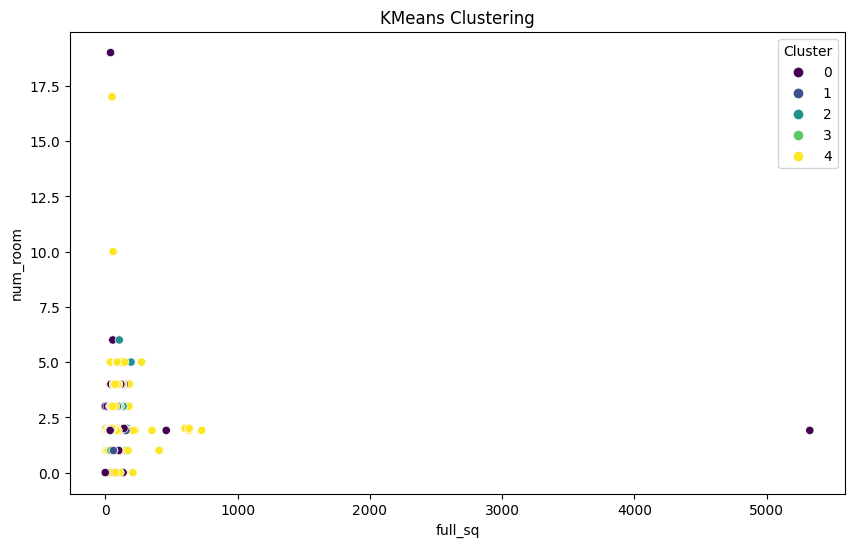

In [81]:
# Применим KMeans
kmeans = KMeans(n_clusters=5)
X_kmeans = data.copy()  # Используем X_train для кластеризации
X_kmeans['Cluster'] = kmeans.fit_predict(X_kmeans)

# Визуализация кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_kmeans['full_sq'], y=X_kmeans['num_room'], hue=X_kmeans['Cluster'], palette='viridis')  # Замените 'feature1' и 'feature2' на фактические названия
plt.title('KMeans Clustering')
plt.show()

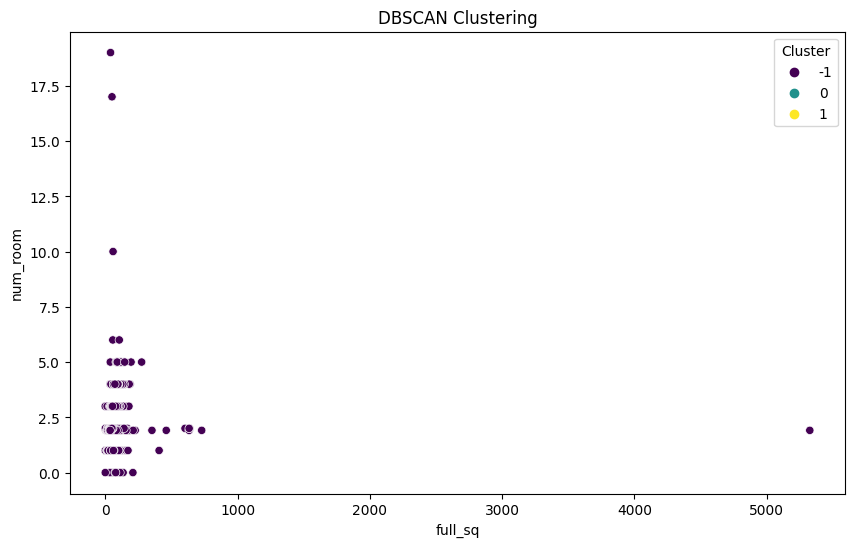

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
X_dbscan = data.copy()
X_dbscan['Cluster'] = dbscan.fit_predict(X_dbscan)

# Визуализация кластеров DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_dbscan['full_sq'], y=X_dbscan['num_room'], hue=X_dbscan['Cluster'], palette='viridis')  # Замените 'feature1' и 'feature2' на фактические названия
plt.title('DBSCAN Clustering')
plt.show()

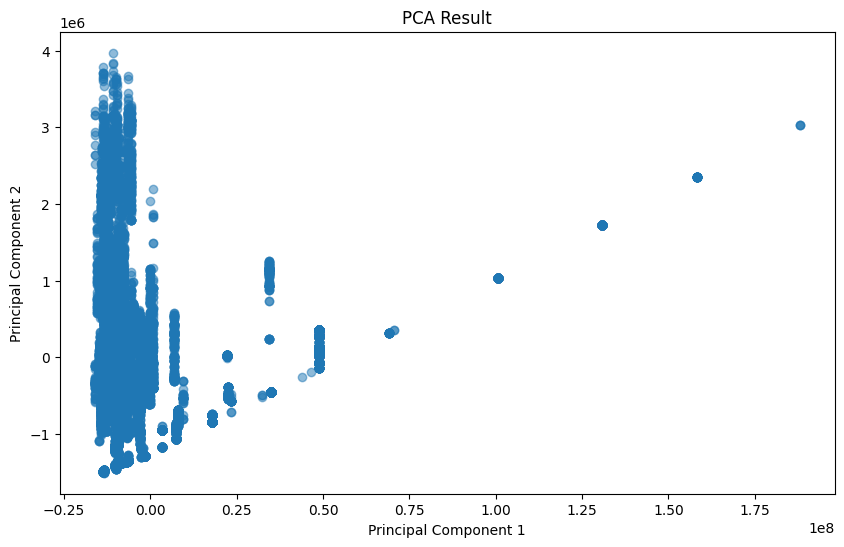

In [84]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

# Визуализация результатов PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

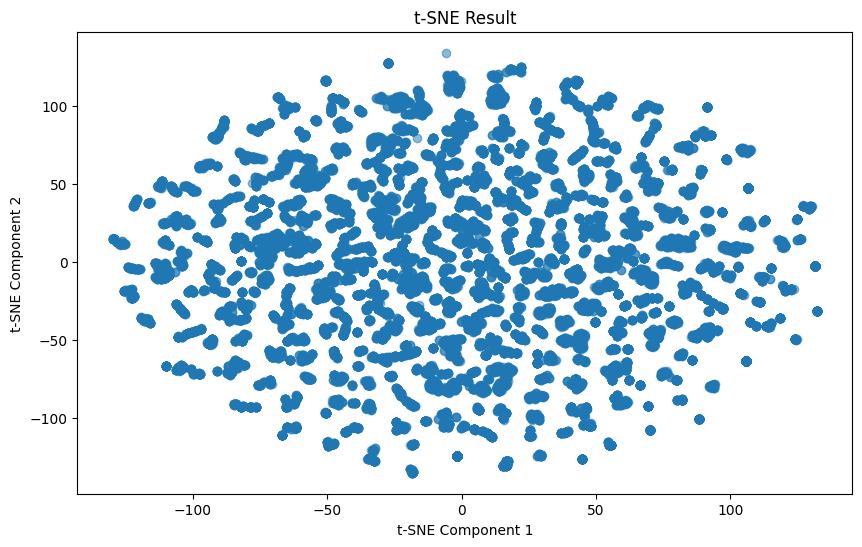

In [86]:
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(data)

# Визуализация результатов t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title('t-SNE Result')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# ML systems design - проектирование продакшн систем.

### Примеры использования

### 1. Оценка недвижимости:

Платформы для оценки и продажи недвижимости могут использовать регрессию с регуляризацией для предсказания рыночной стоимости домов на основе различных характеристик, таких как площадь, количество комнат, расположение и другие параметры.

Преимущества: Модель может адаптироваться к данным и избегать переобучения, что позволяет получать более точные оценки.

Недостатки: Может потребоваться достаточное количество качественных данных для тренировки моделей. Плохое качество данных снизит точность оценок.

### 2. Страхование недвижимости:

Описание: Страховые компании могут использовать регрессию для оценки страховых премий на основе характеристик имущества и риска, связанного с конкретной областью (например, уровень преступности, вероятность стихийных бедствий).

Преимущества: Более точные расценки на страховые взносы помогают избежать финансовых потерь.

Недостатки: Регрессионные модели могут не учесть редкие или экстремальные случаи, что может привести к неправильным расчетам.

### 3. Финансирование и ипотека:
Банки и финансовые учреждения могут использовать регрессию для предсказания вероятности возврата кредита по ипотеке на основе финансовой истории заемщика и характеристик недвижимости.

Преимущества: Упрощает принятие решений о кредитовании и снижает риск невозврата.

Недостатки: Модели могут быть чувствительны к выбору параметров и регуляризации, что требует тщательной настройки.

### 4. Маркетинг и реклама:

Компании могут анализировать жилье в зависимости от ценовых категорий, чтобы более точно нацеливать рекламу на потребителей по их интересам.

Преимущества: Помогает в оптимизации рекламных кампаний, направленных на определенные сегменты рынка.

Недостатки: Необходимость в большом количестве данных о потребительских предпочтениях и настроениях.

### 5. Государственное планирование и анализ:

Использование регессии для анализа рынка жилья может помочь правительствам принимать решения о строительстве инфраструктуры, планировании новых районов и регулировании рынка.

Преимущества: Позволяет более эффективно использовать бюджет и ресурсы для развития городской инфраструктуры.

Недостатки: Сложности в интерпретации моделей могут привести к неверным решениям из-за неполных данных.

### Преимущества и недостатки регрессии с регуляризацией

Преимущества:

Предотвращение переобучения: Регуляризация помогает предотвратить переобучение модели, особенно на небольших наборах данных.

Улучшение интерпретируемости: Регрессионные модели, такие как Lasso (L1-регуляризация), позволяют отбирать важные переменные, что упрощает понимание ключевых факторов, влияющих на целевую переменную.

Стабильность при больших наборах данных: Регуляризация помогает моделям сохранять предсказания одинаковыми при изменении данных.

Недостатки:

Сложность выбора параметров: Настройка параметров регуляризации может потребовать значительных усилий и времени для оптимизации.

Проблемы с мультиколлинеарностью: При сильной корреляции между независимыми переменными модели могут давать неоптимальные или неинтерпретируемые результаты.